<a href="https://colab.research.google.com/github/DeaAnalytics/univ-workshop/blob/main/notebooks/R/C7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  **Análisis C7**

A la data:


*   Empataron las coladas de temperatura con resto de variables
*   Se eliminaron de la columna de Mes los datos numéricos (250 datos)



In [104]:
df <- read.csv("https://github.com/DeaAnalytics/univ-workshop/raw/main/data/Analisis_C7_temperatura.csv", fileEncoding = "latin1")
head(df)

,Mes,Turno,No_Colada,GPO_CH,TCM,No_Cargas,C_Arrabio,C_Primeras,C_Segundas,C_Triturado,⋯,MgO_ESCORIA,FeO_ESCORIA,CaO,SiO2,Al2O3,IB3,IB4,RESULTADO,coladas,TEMPERATURA
,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,Marzo,1,48214,5,174.11,Hibrida,0,8.529091,54.74126,35.09276,⋯,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,49.23,48214,853
2,Marzo,1,48215,5,162.45,1,0,9.048938,48.96891,34.27516,⋯,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,52.33,48215,671
3,Marzo,1,48216,5,164.56,1,0,8.629071,47.05882,36.09626,⋯,10.58,29.67,30.46,10.17,7.42,1.7317,2.33,37.65,48216,780
4,Marzo,1,48217,5,168.31,1,0,10.635138,46.01628,35.03060,⋯,9.24,32.88,27.99,10.71,6.53,1.6235,2.16,60.73,48217,849
5,Marzo,1,48218,5,168.32,1,0,0.000000,56.44011,34.93346,⋯,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,57.62,48218,889
6,Marzo,1,48219,5,169.18,1,0,0.000000,55.10699,37.12023,⋯,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,54.12,48219,833


In [105]:
summary(df)

     Mes                Turno         No_Colada        GPO_CH         
 Length:2364        Min.   :1.000   Min.   :48214   Length:2364       
 Class :character   1st Qu.:1.000   1st Qu.:48806   Class :character  
 Mode  :character   Median :1.000   Median :49398   Mode  :character  
                    Mean   :1.481   Mean   :49397                     
                    3rd Qu.:2.000   3rd Qu.:49989                     
                    Max.   :2.000   Max.   :50580                     
                                                                      
      TCM          No_Cargas           C_Arrabio       C_Primeras   
 Min.   : 91.65   Length:2364        Min.   : 0.00   Min.   : 0.00  
 1st Qu.:160.91   Class :character   1st Qu.: 0.00   1st Qu.:26.41  
 Median :166.30   Mode  :character   Median : 0.00   Median :37.76  
 Mean   :165.53                      Mean   : 1.79   Mean   :40.40  
 3rd Qu.:170.92                      3rd Qu.: 0.00   3rd Qu.:61.70  
 Max.   :213.25   

**Como en el summary, vemos que en el valor de Temperatura tenemos NA's, los vamos a eliminar:**

In [106]:
df <- df[!is.na(df$TEMPERATURA),]
summary(df)

     Mes                Turno        No_Colada        GPO_CH         
 Length:2339        Min.   :1.00   Min.   :48214   Length:2339       
 Class :character   1st Qu.:1.00   1st Qu.:48800   Class :character  
 Mode  :character   Median :1.00   Median :49410   Mode  :character  
                    Mean   :1.48   Mean   :49403                     
                    3rd Qu.:2.00   3rd Qu.:49996                     
                    Max.   :2.00   Max.   :50580                     
                                                                     
      TCM          No_Cargas           C_Arrabio        C_Primeras   
 Min.   : 91.65   Length:2339        Min.   : 0.000   Min.   : 0.00  
 1st Qu.:160.93   Class :character   1st Qu.: 0.000   1st Qu.:25.98  
 Median :166.31   Mode  :character   Median : 0.000   Median :37.49  
 Mean   :165.54                      Mean   : 1.756   Mean   :40.13  
 3rd Qu.:170.93                      3rd Qu.: 0.000   3rd Qu.:61.27  
 Max.   :213.25     

In [107]:
str(df)

'data.frame':	2339 obs. of  50 variables:
 $ Mes                 : chr  "Marzo" "Marzo" "Marzo" "Marzo" ...
 $ Turno               : int  1 1 1 1 1 1 1 1 1 1 ...
 $ No_Colada           : int  48214 48215 48216 48217 48218 48219 48220 48221 48222 48223 ...
 $ GPO_CH              : chr  "5" "5" "5" "5" ...
 $ TCM                 : num  174 162 165 168 168 ...
 $ No_Cargas           : chr  "Hibrida" "1" "1" "1" ...
 $ C_Arrabio           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ C_Primeras          : num  8.53 9.05 8.63 10.64 0 ...
 $ C_Segundas          : num  54.7 49 47.1 46 56.4 ...
 $ C_Triturado         : num  35.1 34.3 36.1 35 34.9 ...
 $ C_Retornos          : num  1.64 7.71 8.22 8.32 8.63 ...
 $ Cumpl_CM            : num  62.3 75.4 75.9 74.7 96.1 ...
 $ Cons_Chorreadura    : num  7.323 0.831 7.863 7.694 7.545 ...
 $ Cons_Ri             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Rendimiento_Teo     : num  87.6 89.1 88.4 88.5 87.9 ...
 $ Altura_Banda        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Tiempo_Ca

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  236.0   619.0   708.0   729.8   805.5  1289.0 

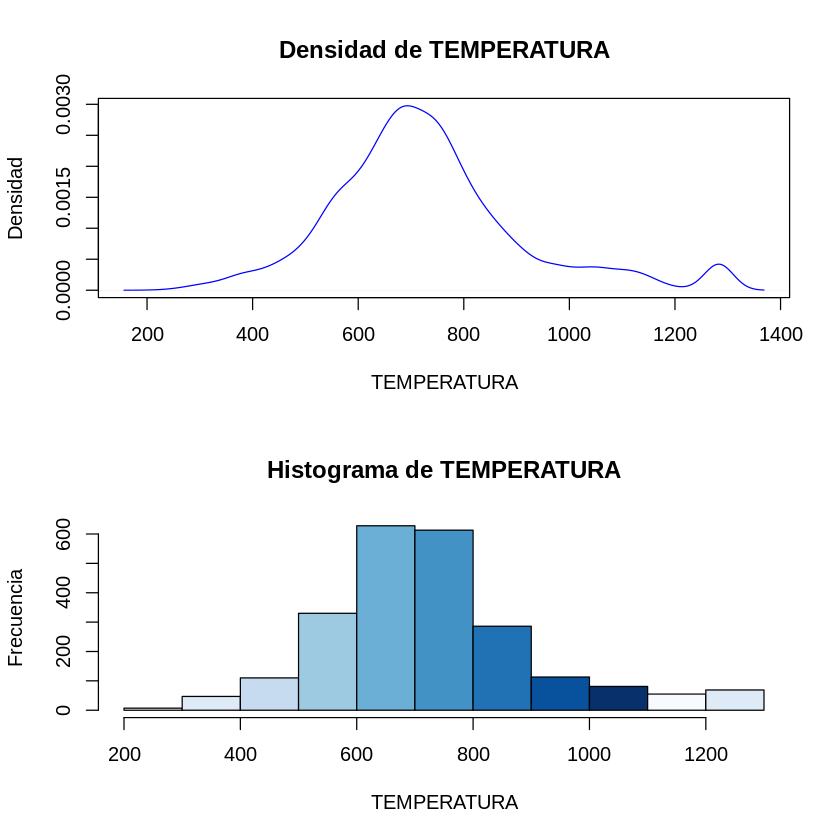

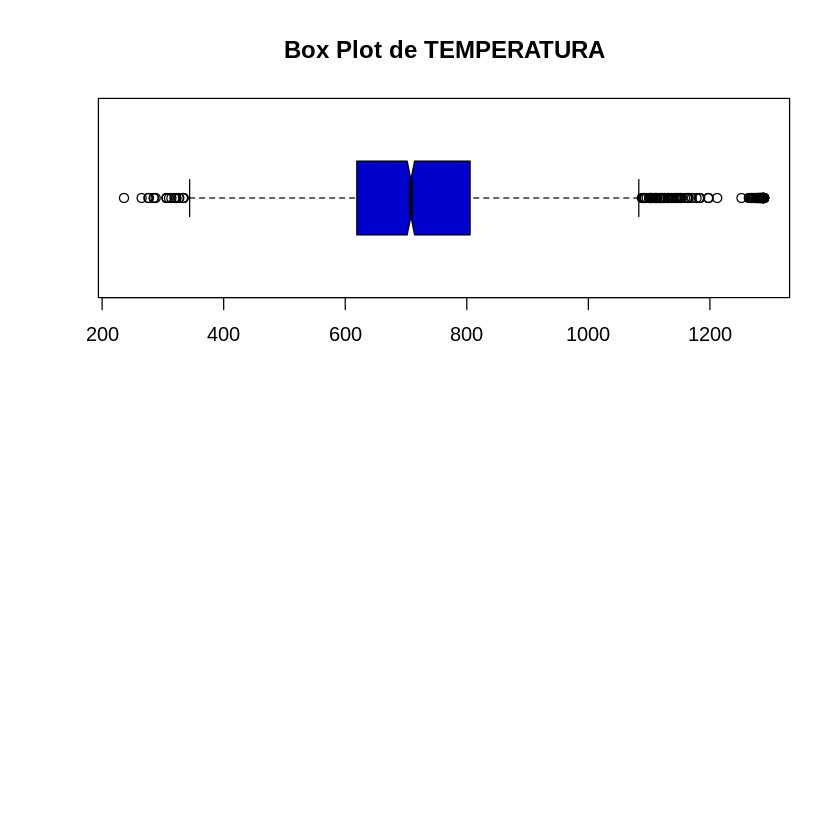

In [108]:
summary(df$TEMPERATURA)
par(mfrow = c(2,1))
plot(density(df$TEMPERATURA), main = "Densidad de TEMPERATURA", xlab = "TEMPERATURA", 
     ylab = "Densidad", col="blue")
hist(x = df$TEMPERATURA, main = "Histograma de TEMPERATURA", xlab = "TEMPERATURA", 
     ylab = "Frecuencia", col=blues9)
boxplot(df$TEMPERATURA, main = "Box Plot de TEMPERATURA", col = c("#0000CC"), notch = T, horizontal = TRUE)
par(mfrow = c(1,1))

**Ahora vamos a hacer un gráfico de dispersión de la Temperatura respecto a los meses:**

In [115]:
df$Mes <- replace(df$Mes, df$Mes == "Marzo", "March")
df$Mes <- replace(df$Mes, df$Mes == "Abril", "April")
df$Mes <- replace(df$Mes, df$Mes == "Mayo", "May")
df$Mes <- replace(df$Mes, df$Mes == "Junio", "June")
head(df)

,Mes,Turno,No_Colada,GPO_CH,TCM,No_Cargas,C_Arrabio,C_Primeras,C_Segundas,C_Triturado,⋯,MgO_ESCORIA,FeO_ESCORIA,CaO,SiO2,Al2O3,IB3,IB4,RESULTADO,coladas,TEMPERATURA
,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,March,1,48214,5,174.11,Hibrida,0,8.529091,54.74126,35.09276,⋯,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,49.23,48214,853
2,March,1,48215,5,162.45,1,0,9.048938,48.96891,34.27516,⋯,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,52.33,48215,671
3,March,1,48216,5,164.56,1,0,8.629071,47.05882,36.09626,⋯,10.58,29.67,30.46,10.17,7.42,1.7317,2.33,37.65,48216,780
4,March,1,48217,5,168.31,1,0,10.635138,46.01628,35.03060,⋯,9.24,32.88,27.99,10.71,6.53,1.6235,2.16,60.73,48217,849
5,March,1,48218,5,168.32,1,0,0.000000,56.44011,34.93346,⋯,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,57.62,48218,889
6,March,1,48219,5,169.18,1,0,0.000000,55.10699,37.12023,⋯,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,54.12,48219,833


In [123]:
df$Mes <- factor(df$Mes, levels = month.name)
summary(df$Mes)

January  February     March     April       May      June      July    August 
        0         0       674       697       742       226         0         0 
September   October  November  December 
        0         0         0         0

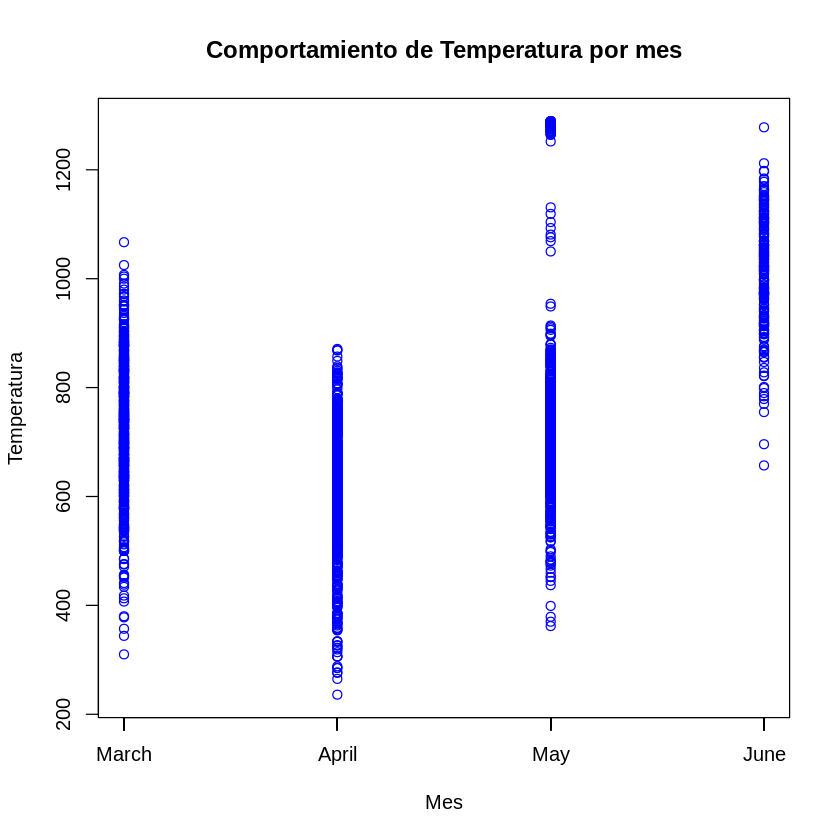

In [135]:
plot(x=as.numeric(df$Mes), y=df$TEMPERATURA, xaxt = "n", xlab = "Mes", ylab = "Temperatura", main = "Comportamiento de Temperatura por mes" , col = c("blue"))
axis(side = 1, at = as.numeric(df$Mes), labels = df$Mes)

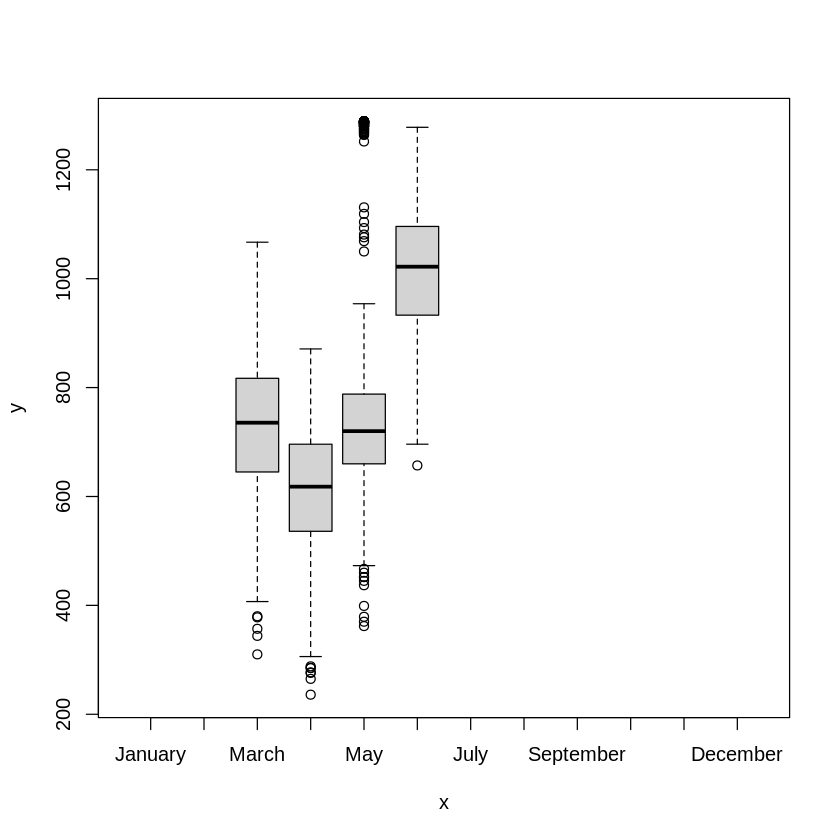

In [154]:
plot(x = df$Mes, y = df$TEMPERATURA)

In [151]:
table(df$GPO_CH)


1 ARRABIO        1A        1B         2        3A        3B         4         5 
       32       544        16       107       248       754       129       509 

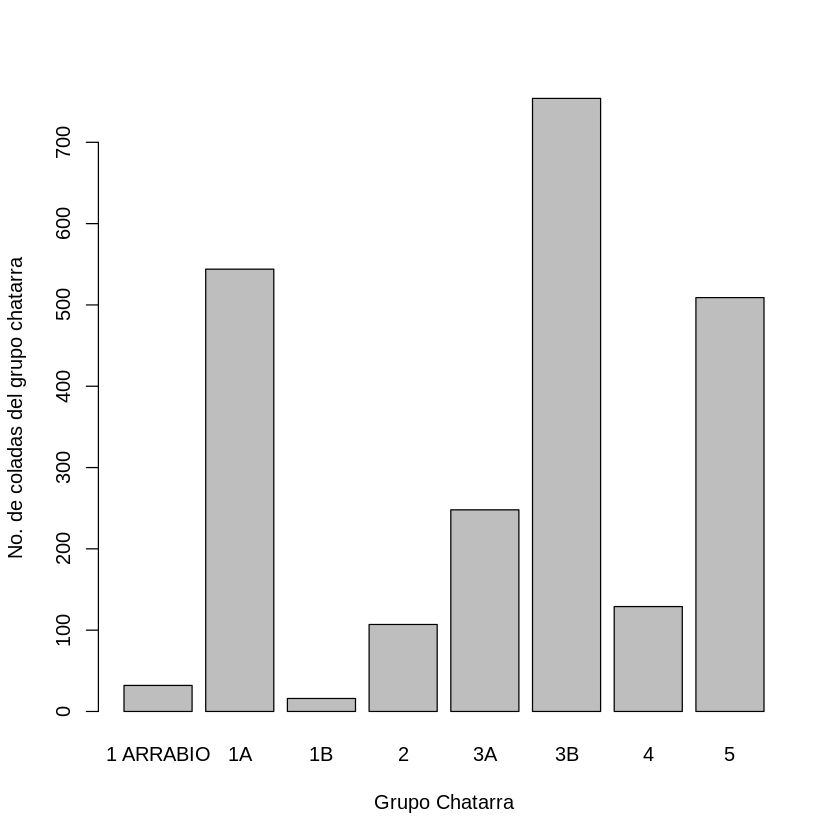

In [153]:
barplot(table(df$GPO_CH), xlab = "Grupo Chatarra", ylab = "No. de coladas del grupo chatarra")

In [156]:
df$GPO_CH <- as.factor(df$GPO_CH)
summary(df$GPO_CH)

1 ARRABIO        1A        1B         2        3A        3B         4         5 
       32       544        16       107       248       754       129       509

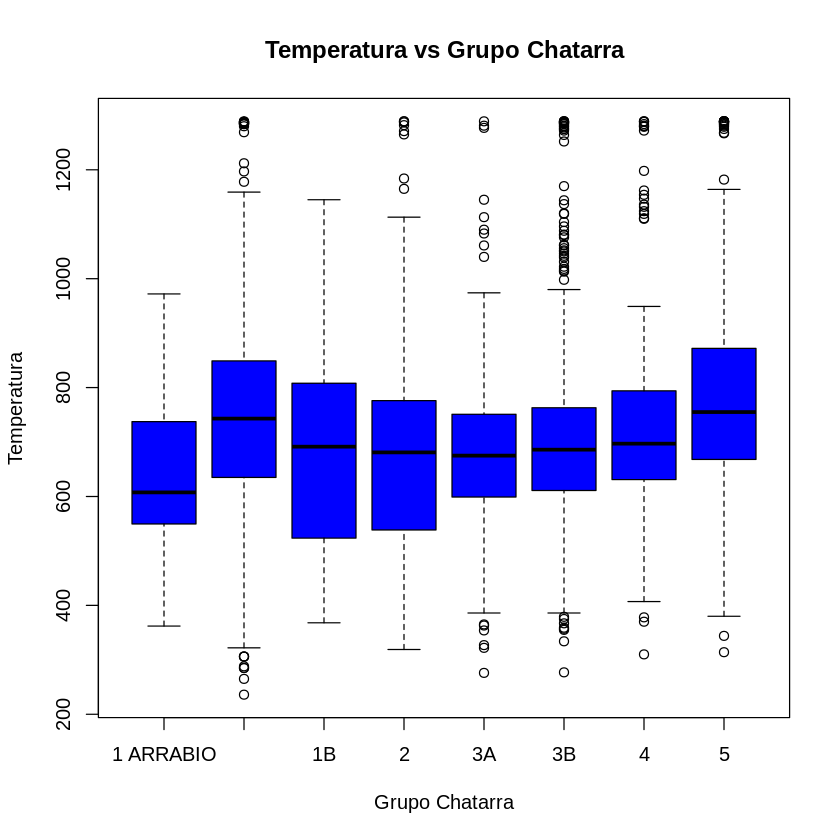

In [165]:
plot(x = df$GPO_CH, y = df$TEMPERATURA, xlab = "Grupo Chatarra", ylab = "Temperatura", main = "Temperatura vs Grupo Chatarra", col = "blue")